# Weather Data
DAILY GLOBAL HISTORICAL CLIMATOLOGY NETWORK (GHCN-DAILY) Version 3.31

https://www.ncei.noaa.gov/pub/data/ghcn/daily/

Before loading the data, it's always a good idea to start by looking at the documentation. Browsing through the file listing at the NOAA repository we see a *readme.txt*. We'll start there. It describes the content of the repository, the format of the weather data files, which have an ending DLY, and which contain data for a single station formatted with fixed width columns. Next, the readme file describes the format of a file ghcnd-stations.txt. That gives us the location, elevation, and ID for each station in the network. We'll start with the stations database.


    IV. FORMAT OF "ghcnd-stations.txt"
    
    ------------------------------
    Variable   Columns   Type
    ------------------------------
    ID            1-11   Character
    LATITUDE     13-20   Real
    LONGITUDE    22-30   Real
    ELEVATION    32-37   Real
    STATE        39-40   Character
    NAME         42-71   Character
    GSN FLAG     73-75   Character
    HCN/CRN FLAG 77-79   Character
    WMO ID       81-85   Character
    ------------------------------


In [2]:
import numpy as np
import matplotlib.pyplot as pp

To load a fixed width text file such as this, we can use **numpy genfromtext**. We specify the width of each field in the parameter delimiter. We can direct the widths from the table above, but we need to increase them to include the spaces between columns. Next, we provide names for each column and we specify the D type of each column. We'll need a string of 11 characters, three double precision floats, and a few more strings. And last, with auto strip, we instruct numpy to remove leading and trailing spacesfrom all the strings it passes.

In [3]:
stations = np.genfromtxt('ghcnd-stations.txt', delimiter=[11,9,10,7,3,31,4,4,6],
                                               names=['id','latitude','longitude','elevation','state','name',
                                                      'gsn','hcn','wmo'],
                                               dtype=['U11','d','d','d','U3','U31','U4','U4','U6'],
                                               autostrip=True)

The result of running this is a numpy array with more than a hundred thousand entries:

In [7]:
len(stations)

127994

In [10]:
stations[0]

np.void(('ACW00011604', 17.1167, -61.7833, 10.1, '', 'ST JOHNS COOLIDGE FLD', '', '', ''), dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

By plotting longitude against latitude, we get an idea of the impressive global coverage of the database.

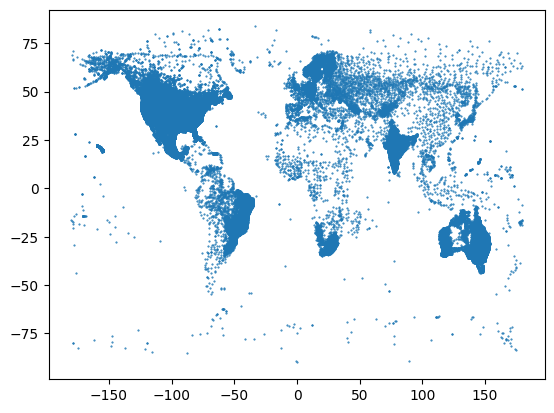

In [6]:
pp.plot(stations['longitude'], stations['latitude'], '.', markersize=1)

The US and Europe are just masses of inkor colored pixels. How about stations in California?

In [29]:
stations_ca = stations[stations['state'] == 'CA']

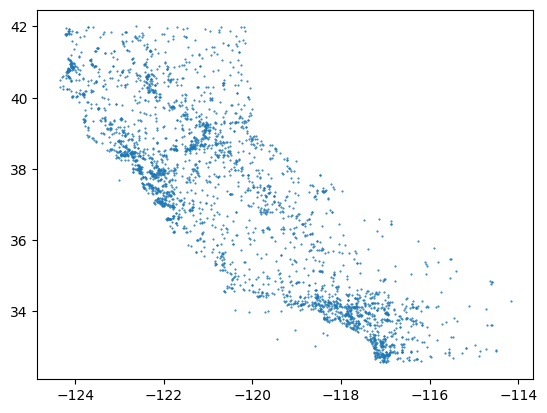

In [31]:
pp.plot(stations_ca['longitude'], stations_ca['latitude'], '.', markersize = 1)

What if we need a specific station? Let's select all stations where the fild name is equal to Pasadena.

In [33]:
stations[stations['name'] == 'PASADENA']

array([('USC00046719', 34.1483, -118.1447, 263.3, 'CA', 'PASADENA', '', 'HCN', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

But thers must be more stations whose name begins with Pasadena. We can find them using the string function **startswith** which in numpy is in the **submodule numpy.char**.

In [37]:
stations[np.char.startswith(stations['name'], 'PASADENA')]

array([('CA1NL000026', 49.0094,  -57.5849,  52.4, 'NL', 'PASADENA 0.5 SE', '', '', ''),
       ('US1CALA0036', 34.1392, -118.1161, 225.2, 'CA', 'PASADENA 2.0 SE', '', '', ''),
       ('US1CALA0043', 34.1619, -118.1073, 277.7, 'CA', 'PASADENA 1.8 E', '', '', ''),
       ('US1CALA0091', 34.1648, -118.1249, 289. , 'CA', 'PASADENA 0.8 ENE', '', '', ''),
       ('US1CALA0124', 34.1336, -118.1416, 234.1, 'CA', 'PASADENA 1.9 S', '', '', ''),
       ('US1MDAA0010', 39.1038,  -76.5443,  13.1, 'MD', 'PASADENA 0.7 SE', '', '', ''),
       ('US1MDAA0013', 39.1263,  -76.5596,  18.9, 'MD', 'PASADENA 1.1 NNW', '', '', ''),
       ('US1MDAA0039', 39.0916,  -76.5112,  10.7, 'MD', 'PASADENA 2.6 ESE', '', '', ''),
       ('US1TXHRR076', 29.6471,  -95.1895,  10.7, 'TX', 'PASADENA 2.4 WSW', '', '', ''),
       ('US1TXHRR084', 29.6339,  -95.1881,  11.9, 'TX', 'PASADENA 2.8 SW', '', '', ''),
       ('US1TXHRR093', 29.6849,  -95.2197,   9.1, 'TX', 'PASADENA 4.4 WNW', '', '', ''),
       ('US1TXHRR094', 29.674

So there are several. We will stay with the first station that we found for Pasadena, which belongs to the HCN networkand is likely to have more data. I've copied the Pasadena file into this repository, *PASADENA.dly*. So let's have a look at the first few lines.

In [38]:
open('PASADENA.dly', 'r').readlines()[:10]

['USC00046719189301TMAX  244  6  272  6  278  6  267  6  272  6  233  6  250  6  267  6  250  6  194  6  156  6  244  6  228  6  200  6  206  6  156  6  144  6  200  6  233  6  206  6  244  6  239  6  261  6  261  6  211  6  111  6  144  6  156  6  139  6  122  6  144  6\n',
 'USC00046719189301TMIN   61  6   78  6   78  6   94  6   67  6   50  6   33  6   78  6   50  6   39  6   33  6   56  6   78  6   50  6   94  6   72  6   28  6   17  6   44  6   61  6   50  6   61  6   78  6   61  6   44  6   28  6   89  6   56  6   61  6  100  6   94  6\n',
 'USC00046719189301PRCP    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    8  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6   64  6  478  6    3  6    5  6  798  6  559  6\n',
 'USC00046719189301SNOW    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0  6    0

It's rather messy, but we recognize the station ID at the beginning of each line, followed by year and month, the name of an element, such as a minimum or maximum temperature, and 31 data points, one for each day of the month.